### 1. 문제정의
- 손글씨(0~9)를 분류하는 모델을 만들어보자.
- 이미지 데이터의 형태를 이해해보자.

### 2. 데이터 수집 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/digit_train.csv')
# 데이터 크기 확인 
data.shape

(42000, 785)

In [3]:
data.head()
# label : 정답 
# pixel0 ~ pixel783 : 28 * 28 이미지 표현

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# 데이터 시각화 
# 이미지 데이터로 첫 번째 행 의 label을 제외한 모든 컬럼 가져오기 
img0 = data.iloc[0,1:]
img0.shape 

(784,)

In [5]:
img0.values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [6]:
# 리스트 자료형을 28 * 28 2차원으로 변환
img0_reshape = img0.values.reshape(28, 28)
img0_reshape

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

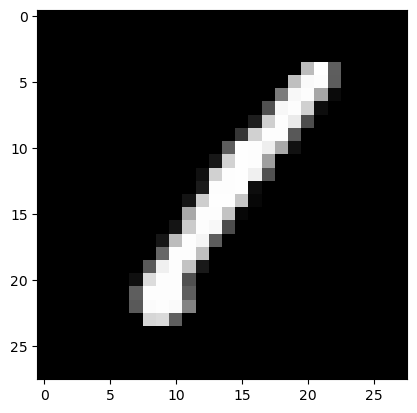

In [7]:
# 이미지 그려보기
# 컬러값을 확인 후 gray로 변경하기 
plt.imshow(img0_reshape, cmap='gray')

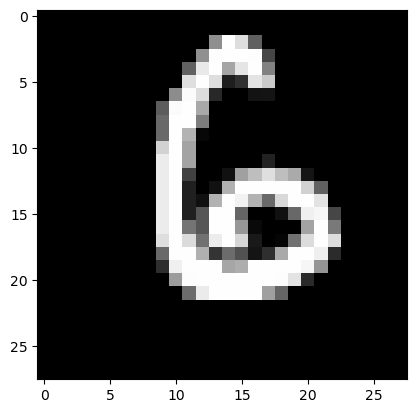

In [8]:
# 13720 행의 데이터 가져와서 이미지 그려보기 
# 컬럼값을 확인 후 gray로 변경하기 
img1 = data.iloc[13720,1:]
img1_reshape = img1.values.reshape(28, 28)
plt.imshow(img1_reshape, cmap='gray')

### 3. 학습을 위한 데이터 분리 
- 학습(7) : 테스트(3)
- random_state : 5

In [9]:
# 1. 문제와 정답 구분
X = data.iloc[:,1:]
y = data.iloc[:, 0]
display(X)
display(y)

# 2. 문제와 정답을 7:3 비율로 나눠주기 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# 3. 각 데이터들의 크기 확인 
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display( y_test.shape)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

(29400, 784)

(12600, 784)

(29400,)

(12600,)

### 모델 선택
 - KNN
 - Logistic Regression
 - SVM

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# 모델 생성 
knn_model = KNeighborsClassifier()
logi_model = LogisticRegression()
svm_model = LinearSVC()

### 학습 및 평가

In [11]:
knn_model.fit(X_train, y_train)
logi_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [12]:
print('knn : ', knn_model.score(X_train, y_train))
print('logi : ',logi_model.score(X_train, y_train))
print('svm : ',svm_model.score(X_train, y_train))

knn :  0.9767006802721089
logi :  0.9420748299319728
svm :  0.8658163265306122


In [13]:
print('knn : ', knn_model.score(X_test, y_test))
print('logi : ',logi_model.score(X_test, y_test))
print('svm : ',svm_model.score(X_test, y_test))

knn :  0.9650793650793651
logi :  0.9147619047619048
svm :  0.835952380952381


### 6. 데이터 스케일링
- 이미지 픽셀정보 : 0 ~ 255 ==> 최소/최대가 고정되어 있음 
- MinMaxScaler를 사용하여 0~1 사이의 값으로 모든 픽셀을 조정 
- 스케일링 적용 후 효과 확인하기 
    - 학습(연산) 속도 개선? 비슷한 것 같다.
    - 거리기반으로 예측하는 KNN 모델이 변화(값)가 있는지? 변화가 없었음.
- KNN : 데이터가 많을수록 속도가 느려짐 --> 모든 데이터에 대한 거리를 계산하기 때문에 

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # 값의 범위를 0 ~ 1 사이로 변환

In [15]:
# 학습 
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
28223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# 문제데이터에 스케일링 적용 
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [18]:
# 스케일링 적용데이터로 다시 학습
knn_model.fit(X_train_scale, y_train)
logi_model.fit(X_train_scale, y_train)
svm_model.fit(X_train_scale, y_train)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [19]:
# 스케일링 적용 데이터의 변화값 확인 

# knn :  0.9767006802721089
# logi :  0.9420748299319728
# svm :  0.8927210884353741

print('knn : ', knn_model.score(X_test_scale, y_test))
print('logi : ',logi_model.score(X_test_scale, y_test))
print('svm : ',svm_model.score(X_test_scale, y_test))

knn :  0.9650793650793651
logi :  0.9180952380952381
svm :  0.9108730158730158


#### 6-1 평가지표 
- 회귀 : 오차를 기반으로 하는 평가지표(MSE, R^2 score) 사용 
- 분류 : 전체 데이터에서 맞춘 개수를 기반으로 평가지표 사용 
    1. 정확도(Accuracy) : 전체 데이터 중에 정확히 맞춘 비율 
    2. 재현율(Recall) : 실제 양성 중에서 정확히 맞춘 비율 
    3. 정밀도(Precision) : 예측 양성 중에서 정확히 맞춘 비율 
    4. F1-score : 정밀도와 재현율의 조화 평균
- SVM : 초평면을 기주으로 소프트 벡터의 마진이 클수록 좋은 결정경계

In [20]:
# 오차행렬 불러오기 
from sklearn.metrics import confusion_matrix

In [21]:
# confusion_matrix(실제값, 예측값)
pre = logi_model.predict(X_test_scale)

In [22]:
test_conf = confusion_matrix(y_test, pre)
test_conf

array([[1196,    0,    4,    3,    4,   14,   12,    1,    4,    0],
       [   0, 1356,    4,    8,    3,    3,    0,    3,    9,    0],
       [   7,   13, 1091,   26,   17,    9,   14,   21,   21,    4],
       [   3,    4,   30, 1212,    2,   46,    1,   12,   24,    7],
       [   3,    7,   11,    2, 1113,    1,   10,    2,   10,   49],
       [  18,    2,    9,   43,   15,  969,   21,   10,   28,    9],
       [   9,    3,   21,    2,   14,   18, 1170,    1,    7,    1],
       [   4,    5,    7,    7,    9,    4,    1, 1267,    3,   42],
       [   9,   29,    9,   38,    4,   28,    4,    4, 1052,   13],
       [  10,    3,    8,   23,   34,   13,    0,   46,   16, 1142]],
      dtype=int64)

In [23]:
# 분류평가지표를 리포트 형식으로 확인하는 함수 
# classification_report
from sklearn.metrics import classification_report
# classification_report(실제값, 예측값)

In [24]:
classification_report(y_test, pre) # print 함수를 통해서 이스케이프 문자 처리 

'              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96      1238\n           1       0.95      0.98      0.97      1386\n           2       0.91      0.89      0.90      1223\n           3       0.89      0.90      0.90      1341\n           4       0.92      0.92      0.92      1208\n           5       0.88      0.86      0.87      1124\n           6       0.95      0.94      0.94      1246\n           7       0.93      0.94      0.93      1349\n           8       0.90      0.88      0.89      1190\n           9       0.90      0.88      0.89      1295\n\n    accuracy                           0.92     12600\n   macro avg       0.92      0.92      0.92     12600\nweighted avg       0.92      0.92      0.92     12600\n'

- support : 데이터의 개수
- Logistic Regression의 예측성능 92%이지만, 각 숫자가 나올 확률은 다름
- f1-score : 정밀도와 재현율을 고려한 수치, 0 ~ 1
    - 수치가 높은게 두 분류지표(정밀도, 재현율)도 높음을 알 수 있음 
    - 1에 가깝다는 것은 정밀도와 재현율이 고르게 높게 분포되어 있음.
- macro avg : 재현율ㅡ 정밀도, f1-score 구해서 각각을 평균을 낸 것 
              - 각 클래스에 대해 얼마나 평균적으로 잘 동작하는지 알고 싶을 때 사용 
- weighted avg(가중평균) : 개별치 각각의 중요도, 영향도(빈도) 등에 따라 가중치를 곱해서 구해지는 평균 

- 상황(서비스)에 맞게 평가지표를 적용 
- Best : 높은 정확도, 높은 정밀도, 높은 재현율 

In [48]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pre, average="macro")

f1

0.916922248826862

### 7. 예측

In [25]:
img12345 = X_test_scale[12345]

In [26]:
logi_model.predict([img12345])

array([7], dtype=int64)

In [27]:
svm_model.predict([img12345])

array([7], dtype=int64)

In [28]:
# 실제 정답 확인 
y_test.iloc[12345]

7

In [46]:
logi_model.predict_proba(X_test_scale[12345:12346]) # 12345번째 값 (0 ~ 9) 숫자가 7일 확률 값
# SVM은 predict_proba함수가 없음

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

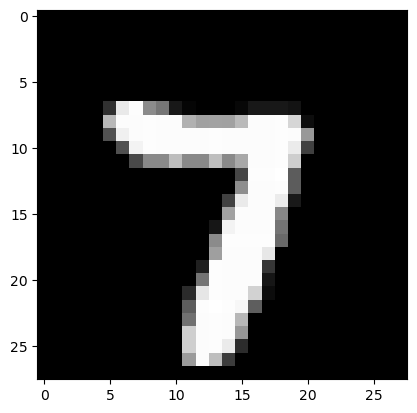

In [36]:
img12345 = X_test_scale[12345]
plt.imshow(img12345.reshape(28,28), cmap="gray")
plt.show()

회귀 : 정답이 연속적인 수치값 --> y햇으로 예측한 값을 그대로 사용
분류 : 정답이 딱 떨어지는 값 --> 정해져 있는 값을 그대로 사용 

선형분류 : 선형함수를 기준으로 해당선의 위에 있는지 아래에 있는지==> 영역으로 예측을 하겠다. 
선형함수는 선형분류에서 결정경계의 역할 

선형분류모델
- 선형함수를 결정경계로 사용
- 가중치들의 합 > 0 ==> 1
- 가중치들의 합 < 0 ==> 0

Logistic Regression 
- sigmoid(S자형 곡선)라는 선형함수 사용
- 결정경계가 곡선으로 그려짐
- sigmoid 함수가 잘 그려졌는지 확인하는기준 ==>교차엔트로피오차함수
  오차들을 다 더해서 크기를 비교하는 함수 
   ==> 오차가 크면 : 안좋은 함수      
         오차가 작을수록 : 좋은 함수 
- sigmoid는 입력값을 0 ~ 1 까지의 범위로 변환 (확률값) 
  기본값 : 0.5
  값 < 0.5 ==> 0
  값 > 0.5 ==> 1

SVM
- 두 데이터를 분류하는 기준선 ==> 초평면(결정경계)
- 초평면을 가장 인접한 데이터를 서포트 벡터라 부름
- 초평면과 서포트 벡터간의 거리를 마진이라 부름 
- 마진이 가장 큰 초평면을 가장 좋은 초평면(결정경계)
- 초평면이 데이터(N)가 가지고 있는 차원(N-1)으로 구성

In [ ]:
# 